In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Read csv
df=pd.read_csv("Zip_ZORI_AllHomesPlusMultifamily_SSA.csv")
#Subset for new york 
new_york=df["Metro"]=="New York, NY"
df=df[new_york]
display(df.head())

,RegionID,RegionName,SizeRank,Metro,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,...,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07
0,61639,10025,1,"New York, NY",3069.0,3077.0,3086.0,3095.0,3104.0,3113.0,...,3304.0,3299.0,3293.0,3287.0,3280.0,3273.0,3267.0,3258.0,3250.0,3241.0
2,61637,10023,3,"New York, NY",3189.0,3199.0,3210.0,3221.0,3230.0,3240.0,...,3404.0,3398.0,3393.0,3387.0,3381.0,3375.0,3369.0,3361.0,3353.0,3346.0
6,61616,10002,7,"New York, NY",2883.0,2891.0,2900.0,2908.0,2916.0,2924.0,...,3283.0,3281.0,3278.0,3275.0,3272.0,3268.0,3264.0,3259.0,3253.0,3248.0
10,62037,11226,11,"New York, NY",1722.0,1731.0,1740.0,1749.0,1758.0,1767.0,...,2151.0,2153.0,2155.0,2157.0,2159.0,2161.0,2163.0,2164.0,2166.0,2167.0
13,61630,10016,16,"New York, NY",3214.0,3225.0,3237.0,3249.0,3260.0,3272.0,...,3561.0,3553.0,3546.0,3539.0,3531.0,3523.0,3515.0,3505.0,3496.0,3486.0


In [2]:
#Melt data frame to display Date and Mean rent value in columns

dates=list(df.columns[4:])
newyork_df=df.melt(id_vars=["RegionName", "Metro"], value_vars=dates, var_name="Date", value_name="Mean rent value")

print(newyork_df.isna().sum())

RegionName            0
Metro                 0
Date                  0
Mean rent value    1755
dtype: int64


In [4]:
#1755 Nan values, not a significant number to affect overall data so going to drop rows with NaN values
newyork_df_dropna=newyork_df.dropna()
print(newyork_df_dropna.describe)

<bound method NDFrame.describe of        RegionName         Metro     Date  Mean rent value
0           10025  New York, NY  2014-01           3069.0
1           10023  New York, NY  2014-01           3189.0
2           10002  New York, NY  2014-01           2883.0
3           11226  New York, NY  2014-01           1722.0
4           10016  New York, NY  2014-01           3214.0
...           ...           ...      ...              ...
16267       11978  New York, NY  2020-07          35537.0
16268        7732  New York, NY  2020-07           1591.0
16269       10006  New York, NY  2020-07           3656.0
16271       10004  New York, NY  2020-07           3327.0
16272       11976  New York, NY  2020-07          35369.0

[14519 rows x 4 columns]>


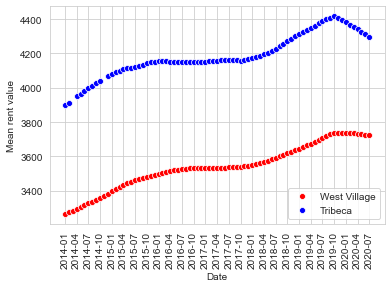

In [30]:
#Subset datafram for West Village and Tribeca neighborhoods
west_village=newyork_df_dropna[newyork_df_dropna["RegionName"]==10014]
tribeca=newyork_df_dropna[newyork_df_dropna["RegionName"]==10013]

sns.set_style('whitegrid')
sns.scatterplot(x="Date", y="Mean rent value", data=west_village, label='West Village', color='r')
sns.scatterplot(x='Date', y='Mean rent value', data=tribeca, label='Tribeca', color='b')

plt.legend(loc='lower right')
plt.xticks(rotation=90)
plt.xticks(np.arange(0, 81, 3))
plt.show()

The graph shows that mean rent value was increasing pretty consistently over the years until COVID-19 became prevalent at the end of 2019. Since COVID, the mean rent value has been declining.